In [1]:
import Pkg
Pkg.activate(".")

  Activating project at `~/BME574`


In [2]:
Pkg.instantiate()

In [4]:
Pkg.add("Distributions")

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
    Updating `~/BME574/Project.toml`
  [31c24e10] + Distributions v0.25.111
    Updating `~/BME574/Manifest.toml`
  [66dad0bd] + AliasTables v1.1.3
  [31c24e10] + Distributions v0.25.111
  [1a297f60] + FillArrays v1.13.0
  [34004b35] + HypergeometricFunctions v0.3.24
  [90014a1f] + PDMats v0.11.31
  [43287f4e] + PtrArrays v1.2.1
  [1fd47b50] + QuadGK v2.11.0
  [79098fc4] + Rmath v0.8.0
  [276daf66] + SpecialFunctions v2.4.0
  [4c63d2b9] + StatsFuns v1.3.2
  [efe28fd5] + OpenSpecFun_jll v0.5.5+0
  [f50d1b31] + Rmath_jll v0.5.1+0
  [4607b0f0] + SuiteSparse
Precompiling project...
  ✓ PtrArrays
  ✓ OpenSpecFun_jll
  ✓ Rmath_jll
  ✓ SuiteSparse
  ✓ FillArrays
  ✓ QuadGK
  ✓ AliasTables
  ✓ Rmath
  ✓ PDMats
  ✓ SpecialFunctions
  ✓ FillArrays → FillArraysPDMatsExt
  ✓ ColorVectorSpace → SpecialFunctionsExt
  ✓ LoopVectorization → SpecialFunctionsExt
  ✓ FillArrays → FillArraysSparseArraysExt
  ✓ Spe

In [8]:
Pkg.add("Plots")

   Resolving package versions...
    Updating `~/BME574/Project.toml`
  [91a5bcdd] + Plots v1.40.8
    Updating `~/BME574/Manifest.toml`
  [d1d4a3ce] + BitFlags v0.1.9
⌅ [c3611d14] ↓ ColorVectorSpace v0.10.0 ⇒ v0.9.10
  [f0e56b4a] + ConcurrentUtilities v2.4.2
  [d38c429a] + Contour v0.6.3
  [8bb1440f] + DelimitedFiles v1.9.1
  [460bff9d] + ExceptionUnwrapping v0.1.10
  [c87230d0] + FFMPEG v0.4.1
  [1fa38f19] + Format v1.3.7
  [28b8d3ca] + GR v0.73.7
  [42e2da0e] + Grisu v1.0.2
  [cd3eb016] + HTTP v1.10.8
⌃ [c817782e] ↓ ImageBase v0.1.7 ⇒ v0.1.5
⌅ [a09fc81d] ↓ ImageCore v0.10.2 ⇒ v0.9.4
⌃ [6a3955dd] ↓ ImageFiltering v0.7.8 ⇒ v0.7.6
⌃ [6218d12a] ↓ ImageMagick v1.3.1 ⇒ v1.2.1
⌃ [80713f31] ↓ ImageSegmentation v1.8.2 ⇒ v1.8.1
  [1019f520] + JLFzf v0.1.8
  [682c06a0] + JSON v0.21.4
  [b964fa9f] + LaTeXStrings v1.3.1
  [23fbe1c1] + Latexify v0.16.5
  [e6f89c97] + LoggingExtras v1.0.3
  [739be429] + MbedTLS v1.1.9
  [442fdcdd] + Measures v0.3.2
  [4d8831e6] + OpenSSL v1.4.3
  [69de0a69] + Pars

In [9]:
using Distributions, Random, LinearAlgebra, Plots

[ Info: Precompiling IJuliaExt [2f4121a4-3b3a-5ce6-9c5e-1f2673ce168a]


In [29]:
xC = [2,1] #center of data (mean)

2-element Vector{Int64}:
 2
 1

In [30]:
sig = [2,0.5] #principal axes

2-element Vector{Float64}:
 2.0
 0.5

In [31]:
theta = pi/3 #rotate cloud by pi/3

1.0471975511965976

In [32]:
R = [cos(theta) sin(theta); -sin(theta) cos(theta)] #rotation matrix

2×2 Matrix{Float64}:
  0.5       0.866025
 -0.866025  0.5

In [33]:
nPoints = 10000 #create 10,000 points
X = randn(nPoints, 2) * Diagonal(sig) * R .+ ones(nPoints, 2) * Diagonal(xC)

10000×2 Matrix{Float64}:
  1.93785    -0.284709
  1.45081     1.17741
  3.50778     2.20141
  2.84246     0.920482
  3.01404     2.59429
  3.53542     4.67665
 -0.260532   -2.34582
  0.628136    0.316952
  0.457993   -0.0930599
  2.91909     1.61632
  2.14366     0.567848
  0.570943   -1.81884
  0.924195   -0.435323
  ⋮          
  1.00845    -1.79716
  1.60617     0.857977
  2.94066     1.1699
  0.923845   -1.61106
  0.716441   -0.0685737
  1.5491     -0.155798
 -0.0120884  -1.47258
  1.49243    -0.0445805
  1.76876     2.00126
  3.5759      3.7302
  2.90975     2.0633
  0.38253    -1.10451

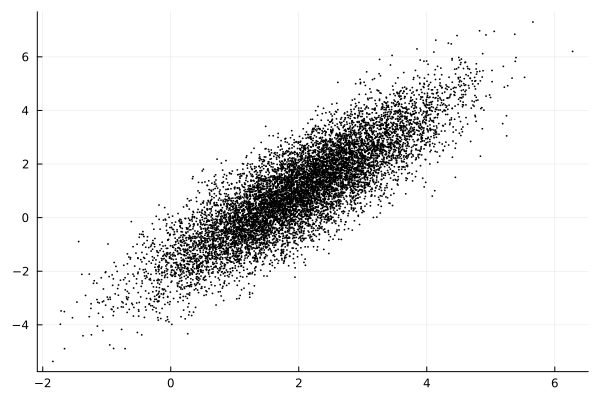

In [34]:
scatter(X[:, 1], X[:, 2], color=:black, markersize=1, legend=false) #plot data

In [35]:
Xavg = mean(X, dims=1)  #compute mean
B = X .- ones(nPoints, 1) * Xavg  #Mean-subtracted data
U, S, V = svd(B / sqrt(nPoints)) #PCA via SVD

SVD{Float64, Float64, Matrix{Float64}, Vector{Float64}}
U factor:
10000×2 Matrix{Float64}:
 -0.00572817   0.0117479
 -0.00057552  -0.0112782
  0.00911765   0.0139235
  0.00183285   0.0152766
  0.00958149   0.00148244
  0.0200028   -0.010372
 -0.0203116   -0.00551156
 -0.00642242  -0.0168449
 -0.00864557  -0.0156738
  0.00506761   0.00963343
 -0.00148093   0.00676259
 -0.0158994    0.00354406
 -0.00895813  -0.00421399
  ⋮           
 -0.0146946    0.0108671
 -0.00157702  -0.00540399
  0.00317182   0.0144729
 -0.0140961    0.00754652
 -0.00788283  -0.0114648
 -0.00615127   0.00375818
 -0.0158658   -0.00996918
 -0.00580912   0.00166844
  0.00383081  -0.0140436
  0.0159702   -0.000202459
  0.00699685   0.00499913
 -0.0132563   -0.0068519
singular values:
2-element Vector{Float64}:
 1.9792033665548672
 0.5017810836204445
Vt factor:
2×2 Matrix{Float64}:
 0.502174   0.864767
 0.864767  -0.502174

In [36]:
theta_vals = collect(0:0.01:1) * 2*pi

101-element Vector{Float64}:
 0.0
 0.06283185307179587
 0.12566370614359174
 0.18849555921538758
 0.25132741228718347
 0.3141592653589793
 0.37699111843077515
 0.4398229715025711
 0.5026548245743669
 0.5654866776461628
 0.6283185307179586
 0.6911503837897545
 0.7539822368615503
 ⋮
 5.592034923389832
 5.654866776461628
 5.717698629533424
 5.7805304826052195
 5.843362335677016
 5.9061941887488105
 5.969026041820607
 6.031857894892402
 6.094689747964199
 6.157521601035994
 6.220353454107791
 6.283185307179586

In [38]:
S_diag = Diagonal(S)  # Convert S into a diagonal matrix
Xstd = [cos.(theta_vals) sin.(theta_vals)] * S_diag * V' # 1std confidence interval

101×2 Matrix{Float64}:
 0.993904  1.71155
 1.01919   1.69235
 1.04045   1.66647
 1.05761   1.63402
 1.07059   1.59511
 1.07935   1.54991
 1.08385   1.4986
 1.08407   1.44137
 1.08001   1.37845
 1.07169   1.31009
 1.05914   1.23656
 1.04241   1.15815
 1.02157   1.07517
 ⋮         
 0.489223  1.47939
 0.549031  1.53278
 0.606673  1.58013
 0.66192   1.62124
 0.714555  1.65594
 0.76437   1.68412
 0.811169  1.70565
 0.854766  1.72044
 0.89499   1.72845
 0.931681  1.72963
 0.964696  1.72399
 0.993904  1.71155

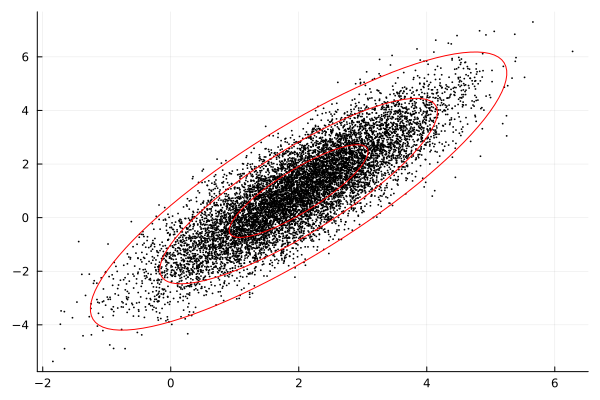

In [39]:
plot!(Xavg[1] .+ Xstd[:, 1], Xavg[2] .+ Xstd[:, 2], color=:red, label="1 std")
plot!(Xavg[1] .+ 2*Xstd[:, 1], Xavg[2] .+ 2*Xstd[:, 2], color=:red, label="2 std")
plot!(Xavg[1] .+ 3*Xstd[:, 1], Xavg[2] .+ 3*Xstd[:, 2], color=:red, label="3 std")
